## Import python modules

In [39]:
# Import Python libraries
# ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ternary 
#from uncertainties import unumpy

sns.set(style='ticks', context='talk', palette='Dark2')

## Sample EA clinopyroxene compositions

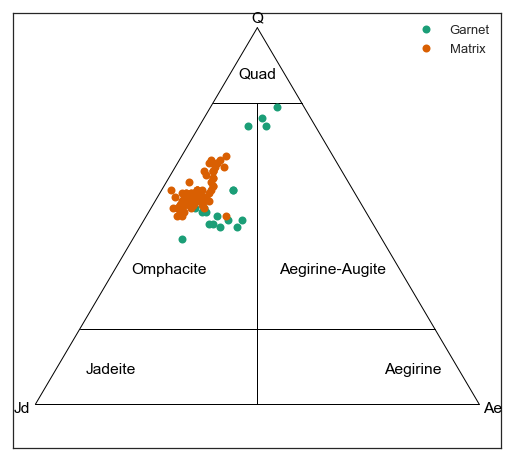

In [40]:
#Plot pyroxene ternary (q-jd-ae)
cpx = pd.read_csv('../data/cpx-end-members.csv')

# Field boudaries
p1 =(0.1, 0.8, 0.1)
p2 = (0.5, 0.0, 0.5)
p3 = (0.28492313,  0.40526588,  0.30981099)

figure, tax = ternary.figure(scale=1)
tax.boundary(linewidth=1.0)
tax.clear_matplotlib_ticks()

# Draw field boundaries
tax.line(p1, p2, color='black',linewidth=1.0)
tax.horizontal_line(.8, color='black',linewidth=1.0)
tax.horizontal_line(.2, color='black',linewidth=1.0)

# Label the fields
plt.text(0.5, 0.75, 'Quad', color='black', ha='center')
plt.text(0.3, 0.3, 'Omphacite', color='black', ha='center')
plt.text(0.67, 0.3, 'Aegirine-Augite', color='black', ha='center')
plt.text(0.17, 0.07, 'Jadeite', color='black', ha='center')
plt.text(0.85, 0.07, 'Aegirine', color='black', ha='center')

# Label the apecies
plt.text(-0.03, -0.02, 'Jd', color='black', ha='center')
plt.text(1.03, -0.02, 'Ae', color='black', ha='center')
plt.text(0.5, 0.88, 'Q', color='black', ha='center')

# ---
px = cpx.groupby('Location')

for name, group in px:
    ae = group.Ae
    q = group.Q
    jd = group.Jd
    # Pyroxene points
    jaq = np.column_stack((ae, q, jd))
    # Plot points
    tax.plot(jaq, linestyle='', marker='o', ms=8, label=name)
plt.legend()

# Size figure
figure.set_figheight(8)
figure.set_figwidth(8.75)

plt.savefig('../figs/supplement-ea-cpx.png')

## Sample EA amphibole compositions

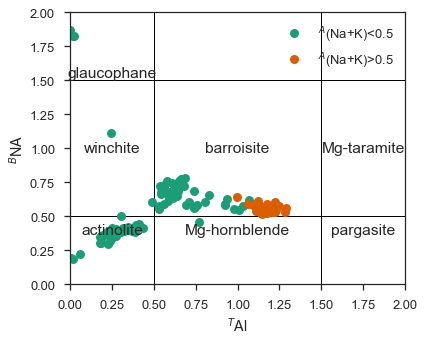

In [41]:
amp = pd.read_csv('../data/amp-end-members.csv')

plt.figure(figsize=(6,5))

mkt = amp[(amp.NaK_A>0.5)]
amph = amp[amp.NaK_A<=0.5]

plt.plot(amph.Al_T, amph.Na_B, linestyle='', marker='o', ms=9, label='$^{A}$(Na+K)<0.5')
plt.plot(mkt.Al_T, mkt.Na_B, linestyle='', marker='o',ms=9, label='$^{A}$(Na+K)>0.5')


#plt.plot(df.Al_T, df.Na_B, linestyle='', marker='o', markeredgecolor='white', ms=9)

plt.hlines(1.5, 0., 2., linewidth=1)
plt.hlines(0.5, 0., 2., linewidth=1)
plt.vlines(1.5, 0., 2., linewidth=1)
plt.vlines(0.5, 0., 2., linewidth=1)
plt.xlim(0, 2)
plt.ylim(0, 2)

plt.text(0.25, 1.55, 'glaucophane', horizontalalignment='center', verticalalignment='center')
plt.text(0.25, 1, 'winchite', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, 'barroisite', horizontalalignment='center', verticalalignment='center')
plt.text(1.75, 1, 'Mg-taramite', horizontalalignment='center', verticalalignment='center')
plt.text(0.25, .4, 'actinolite', horizontalalignment='center', verticalalignment='center')
plt.text(1, .4, 'Mg-hornblende', horizontalalignment='center', verticalalignment='center')
plt.text(1.75, .4, 'pargasite', horizontalalignment='center', verticalalignment='center')
#plt.text(1.87, 1.87, '(A)', horizontalalignment='center', verticalalignment='center', fontweight='bold')


plt.xlabel('$^T$Al');
plt.ylabel('$^B$NA');
#plt.title('Easton Metamorphic Suite')
plt.legend();


plt.savefig('../figs/supplement-ea-amphibole.png')

## Sample EA garnet compositions

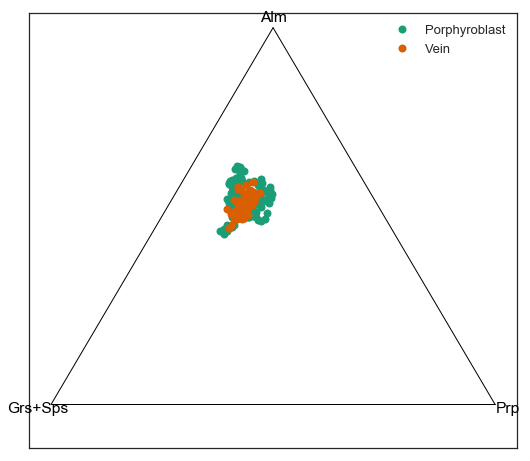

In [43]:
grt = pd.read_csv('../data/grt-end-members.csv', sep='\t')

# Import grt data
figure, tax = ternary.figure(scale=1)
tax.boundary(linewidth=1.0)
tax.clear_matplotlib_ticks()

# Label the apecies
plt.text(-0.03, -0.02, 'Grs+Sps', color='black', ha='center')
plt.text(1.03, -0.02, 'Prp', color='black', ha='center')
plt.text(0.5, 0.88, 'Alm', color='black', ha='center')

# ---
grts = grt.groupby('Type')

for name, group in grts:
    pga = np.column_stack((group.Prp, group.Alm, group.GrsSps))
    tax.plot(pga, linestyle='', marker='o', ms=8, label=name)
plt.legend()


# Size figure
figure.set_figheight(8)
figure.set_figwidth(8.75)

plt.savefig('../figs/supplement-ea-garnet.png')
plt.savefig('../figs/supplement-ea-garnet.pdf')
